# Lab Assignment 1



PAPA DAVIDE BASILE, s2294876

## Task 1

Use `SymPy` to solve the differential equation $y' = (2y-3y^2)\sin(x)$, with $y(0)=0.5$, and plot the solution.

In [1]:
import sympy as sym
sym.init_printing()
from IPython.display import display_latex
import sympy.plotting as sym_plot

x = sym.symbols('x') #define the variable x
y = sym.Function('y') # define the function y
eq = sym.Eq(y(x).diff(x), (2*y(x)-(3*(y(x)**2)))*sym.sin(x)) # Define the differential equation
sol = sym.dsolve(eq, y(x), ics = {y(0): 0.5}) #Solve the IVP

display_latex(sol) #display the solution, it can help with deciding the domain of interest. 

#In this case I chose (0, 4pi) for the domain to show that the function is periodic, and since y(x) is an even function, it's symmetric about the y-axis. 
sym_plot.plot(sol.rhs, (x, 0, 4*sym.pi), xlabel = 'x', ylabel = ('y(x)'))

## Task 2

Use `SciPy`'s `odeint` function to solve the system of equations

\begin{align*}
\frac{dx}{dt}&=xy -2.1x \\ \frac{dy}{dt} &= 0.8y - 0.4xy
\end{align*}

Produce a plot of the solutions for $0\leq t\leq 20$ with initial conditions $x(0)=0.5$ and $y(0) \in \{1, 3, 5, \ldots, 19\}$.

How many curves do you expect to see plotted?

Qualitatively, what happens to the solution, $(x(t),y(t))$, as $y(0)$ becomes large?

<IPython.core.display.Javascript object>


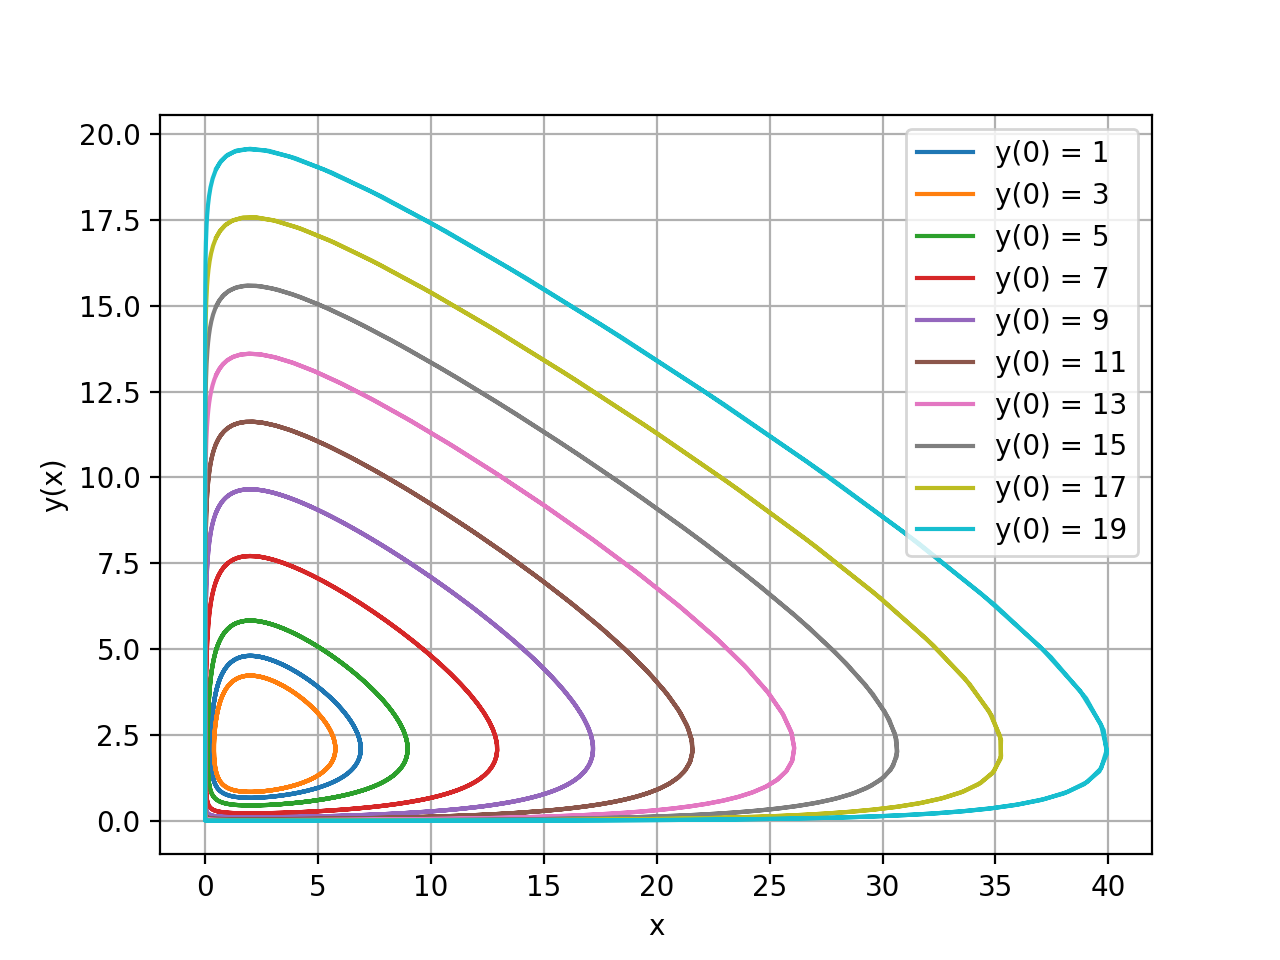

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib notebook

#define differential equation through a function
def dX_dt(X, t):     
    x, y = X
    return [x*y - 2.1*x, 0.8*y - 0.4*x*y]

#Create an array of 20 evenly spaced values of t, make enough step so that the curves approach their real value
t = np.linspace(0, 20, 1000)

#Find and plot the solution for all the required initial conditions, given that we have 10 initial conditions, we expect to see plotted 10 different curves
for y0 in np.arange(1, 21, 2):
    X0 = [0.5, y0]
    sol = odeint(dX_dt, X0, t)
    plt.plot(sol[:, 0], sol[:, 1], label = f'y(0) = {y0}')
    
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend(loc = 'best')
plt.grid()
    
